In [1]:
import os

try:
    snakemake
except NameError:
    from snakemk_util import load_rule_args
    
    os.chdir('../..')
    
    snakemake = load_rule_args(
        snakefile = os.getcwd() + "/workflow/Snakefile",
        rule_name = 'plot_read_aligned_len',
        root = '..'
    )

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dfs = list()

for data_source in snakemake.input.keys():
    
    for txt in snakemake.input[data_source]:
        _df = pd.read_csv(txt, header=None) \
            .rename(columns={0: 'read length'})
        _df['data source'] = data_source.replace('_', ' ')
        dfs.append(_df)
    
df = pd.concat(dfs)

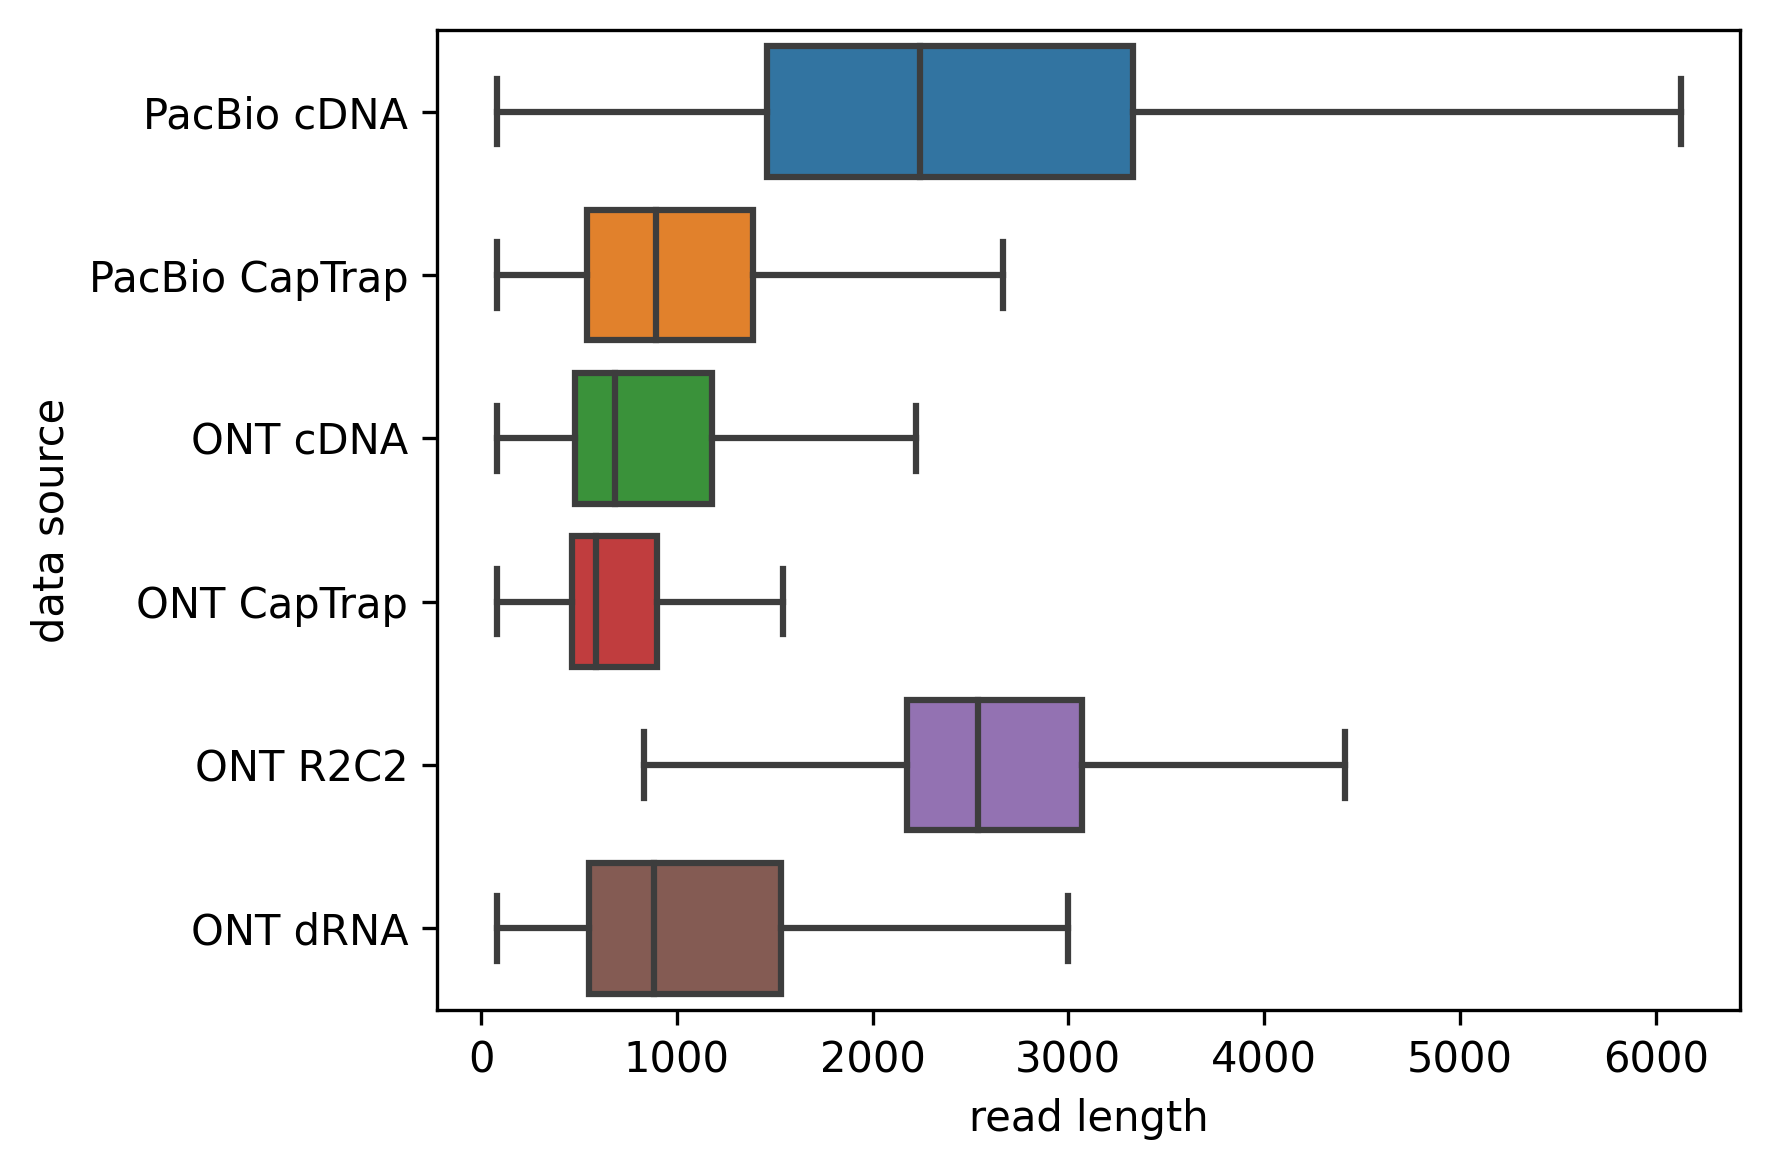

In [4]:
plt.figure(figsize=(6, 4), dpi=300)

ax = sns.boxplot(data=df, x='read length', y='data source', orient="h", showfliers=False)
plt.tight_layout()
plt.savefig(snakemake.output['fig'], bbox_inches = "tight")

In [5]:
df = df.groupby('data source').describe().astype(int)
df = df['read length']

In [6]:
df.to_csv(snakemake.output['table'])